In [1]:
from statistics import mean
from time import time
import numpy as np
import matplotlib.pyplot as plt

from core.fileProcessing.Loader import LoadCranDataset
from core.basics.Vectorizer import Vectorizer
from core.boolean.BooleanModel import BooleanModel
from core.vectorial.VectorialModel import VectorialModel
from core.probabilistic.ProbabilisticModel import ProbabilisticModel

In [2]:
documents, consults = LoadCranDataset("./Test Collections/Cran/")

In [3]:
def evaluate_model(relevant_fun, consult_fun, beta2=2):
    precision = []
    recall = []
    f = []
    f1 = []
    fallout = []
    tme = []
    mp = []
    
    for q in consults:
        relevant = relevant_fun(q)
        
        begTime = time()
        recovered = consult_fun(q)
        timeElapsed = time() - begTime
        
        founded, s = 0, 0
        for i, d in enumerate(recovered):
            if d.id in relevant:
                founded += 1
                s += founded / (i + 1)
        if len(relevant) > 0: mp.append(s / len(relevant))

        rr = sum((1 if i.id in relevant else 0 for i in recovered))
        ri = len(recovered) - rr
        nr = len(relevant) - rr
        ni = len(documents) - ri - nr - rr
        
        if len(recovered) > 0: p = rr / (rr + ri)
        else: p = 1 if len(relevant) == 0 else 0
        precision.append(p)
            
        if len(relevant) > 0: r = rr / (rr + nr)
        else: r = 1 if len(recovered) == 0 else 0
        recall.append(r)
        
        if p > 0 and r > 0: 
            f.append((1 + beta2) / (1 / p + beta2 / r))
            f1.append(2 / (1 / p + 1 / r))
            
        if ri + ni > 0:
            fallout.append(ri / (ri + ni))
        
        tme.append(timeElapsed)
    return precision, recall, f, \
           f1, fallout, tme, mp

# Boolean model

In [4]:
booleanModel = BooleanModel(documents)

In [22]:
relevant_fun = lambda q: [i[1] for i in q.relevant if i[2] == 1]
consult_fun = booleanModel.Consult
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")


Precision: 0.6875555555555556
Recall: 0.6948148148148148
F metric: 0.9879173904651611
F1 metric: 0.9869578404610252
Fallout: 0.00011437198265563506
Time: 0.0792293824089898 seg


In [23]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = booleanModel.Consult
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")

Precision: 0.02822222222222222
Recall: 0.011764870931537597
F metric: 0.31856802085382646
F1 metric: 0.3462740726167836
Fallout: 7.322982235393498e-05
Time: 0.07944664743211534 seg


In [5]:
relevant_fun = lambda q: [i[1] for i in q.relevant if i[2]]
consult_fun = lambda q: booleanModel.Consult(q, relaxed=True)
_, _, _, _, _, t, m  = evaluate_model(relevant_fun, consult_fun)

print("Time:", mean(t), "seg")
print("Mean Average Precision:", mean(m))

Time: 0.26559971385531955 seg
Mean Average Precision: 0.20684045580381702


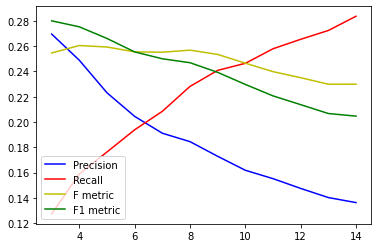

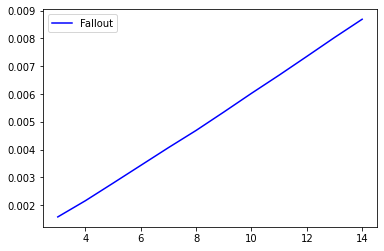

In [6]:
x = np.arange(3, 15)
ps, rs, fs, f1s, fls = [], [], [], [], []

for i in x:
    relevant_fun = lambda q: [i[1] for i in q.relevant if i[2]]
    consult_fun = lambda q: booleanModel.Consult(q, size=i, relaxed=True)
    p, r, f, f1, fl, _, _  = evaluate_model(relevant_fun, consult_fun)
    ps.append(mean(p))
    rs.append(mean(r))
    fs.append(mean(f))
    f1s.append(mean(f1))
    fls.append(mean(fl))

plt.plot(x, ps, 'b', label='Precision')
plt.plot(x, rs, 'r', label='Recall')
plt.plot(x, fs, 'y', label='F metric')
plt.plot(x, f1s, 'g', label='F1 metric')
plt.legend()

plt.figure()
plt.plot(x, fls, 'b', label='Fallout')
plt.legend()
plt.show()

In [7]:
relevant_fun = lambda q: [i[1] for i in q.relevant if i[2]]
consult_fun = lambda q: booleanModel.Consult(q, size=5, relaxed=True)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")

Precision: 0.22311111111111112
Recall: 0.17627755645551454
F metric: 0.2593757254649327
F1 metric: 0.2661381405849819
Fallout: 0.002790524968809019
Time: 0.2582526599036323 seg


# Vectorial model

In [60]:
vectorialModel = VectorialModel(documents)

In [34]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = vectorialModel.Consult
_, _, _, _, _, t, m  = evaluate_model(relevant_fun, consult_fun)

print("Time:", mean(t), "seg")
print("Mean Average Precision:", mean(m))

Time: 0.029442757500542534 seg
Mean Average Precision: 0.41295538417786964


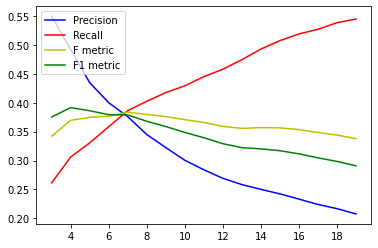

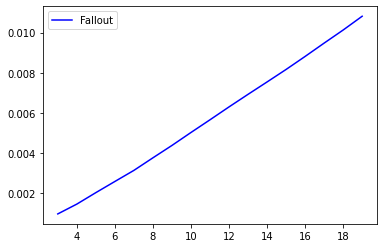

In [38]:
x = np.arange(3, 20)
ps, rs, fs, f1s, fls = [], [], [], [], []

for i in x:
    relevant_fun = lambda q: [i[1] for i in q.relevant]
    consult_fun = lambda q: vectorialModel.Consult(q, i)
    p, r, f, f1, fl, _, _  = evaluate_model(relevant_fun, consult_fun)
    ps.append(mean(p))
    rs.append(mean(r))
    fs.append(mean(f))
    f1s.append(mean(f1))
    fls.append(mean(fl))

plt.plot(x, ps, 'b', label='Precision')
plt.plot(x, rs, 'r', label='Recall')
plt.plot(x, fs, 'y', label='F metric')
plt.plot(x, f1s, 'g', label='F1 metric')
plt.legend()

plt.figure()
plt.plot(x, fls, 'b', label='Fallout')
plt.legend()
plt.show()

In [36]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: vectorialModel.Consult(q, 7)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")

Precision: 0.37587301587301586
Recall: 0.3863849319101161
F metric: 0.3837246580161066
F1 metric: 0.37888180812996874
Fallout: 0.0031370750684336533
Time: 0.030347710715399847 seg


In [55]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
def consult_fun(q, size=7, steps=10):
    remarkable = vectorialModel.Consult(q, size)
    relevant = relevant_fun(q)
    for _ in range(steps):
        retro_relevant = [d.id for d in remarkable if d.id in relevant]
        retro_irrelevant = [d.id for d in remarkable if d.id not in relevant]
        remarkable = vectorialModel.ReConsult(q, retro_relevant, retro_irrelevant, size)
    return remarkable

p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")

Precision: 0.4901587301587301
Recall: 0.4958406699391469
F metric: 0.4973346012207624
F1 metric: 0.4925626467368629
Fallout: 0.002561774630623849
Time: 0.3585397985246446 seg


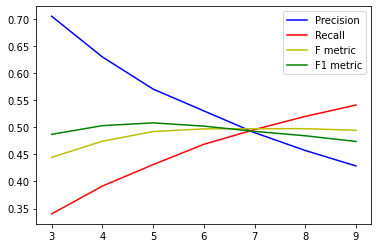

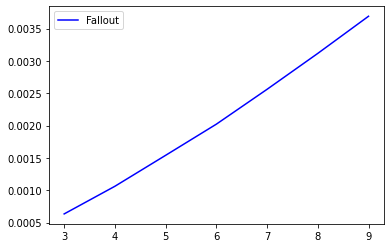

In [61]:
x = np.arange(3, 10)
ps, rs, fs, f1s, fls = [], [], [], [], []
relevant_fun = lambda q: [i[1] for i in q.relevant]
def consult_fun(q, size=7, steps=10):
    remarkable = vectorialModel.Consult(q, size)
    relevant = relevant_fun(q)
    for _ in range(steps):
        retro_relevant = [d.id for d in remarkable if d.id in relevant]
        retro_irrelevant = [d.id for d in remarkable if d.id not in relevant]
        remarkable = vectorialModel.ReConsult(q, retro_relevant, retro_irrelevant, size)
    return remarkable

for i in x:
    wrapper = lambda q: consult_fun(q, size=int(i), steps=10)
    p, r, f, f1, fl, _, _  = evaluate_model(relevant_fun, wrapper)
    ps.append(mean(p))
    rs.append(mean(r))
    fs.append(mean(f))
    f1s.append(mean(f1))
    fls.append(mean(fl))

plt.plot(x, ps, 'b', label='Precision')
plt.plot(x, rs, 'r', label='Recall')
plt.plot(x, fs, 'y', label='F metric')
plt.plot(x, f1s, 'g', label='F1 metric')
plt.legend()

plt.figure()
plt.plot(x, fls, 'b', label='Fallout')
plt.legend()
plt.show()

# Probabilistic model

In [38]:
probabilisticModel = ProbabilisticModel(documents)

In [18]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = probabilisticModel.Consult
_, _, _, _, _, t, m  = evaluate_model(relevant_fun, consult_fun)

print("Time:", mean(t), "seg")
print("Mean Average Precision:", mean(m))

Time: 0.09656340705023872 seg
Mean Average Precision: 0.3066475060267732


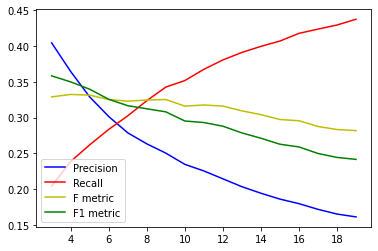

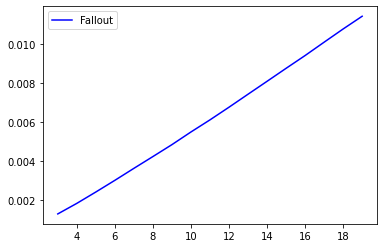

In [19]:
x = np.arange(3, 20)
ps, rs, fs, f1s, fls = [], [], [], [], []

for i in x:
    relevant_fun = lambda q: [i[1] for i in q.relevant]
    consult_fun = lambda q: probabilisticModel.Consult(q, i)
    p, r, f, f1, fl, _, _  = evaluate_model(relevant_fun, consult_fun)
    ps.append(mean(p))
    rs.append(mean(r))
    fs.append(mean(f))
    f1s.append(mean(f1))
    fls.append(mean(fl))

plt.plot(x, ps, 'b', label='Precision')
plt.plot(x, rs, 'r', label='Recall')
plt.plot(x, fs, 'y', label='F metric')
plt.plot(x, f1s, 'g', label='F1 metric')
plt.legend()

plt.figure()
plt.plot(x, fls, 'b', label='Fallout')
plt.legend()
plt.show()

In [39]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: probabilisticModel.Consult(q, 6)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")

Precision: 0.30148148148148146
Recall: 0.28354333332389275
F metric: 0.32527967205110536
F1 metric: 0.32558353003192786
Fallout: 0.0030106663594186775
Time: 0.09261726273430718 seg


In [26]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: probabilisticModel.Consult(q, size=20, retroalimentation=10)
_, _, _, _, _, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Time:", mean(t), "seg")

Time: 0.8800094148847792 seg


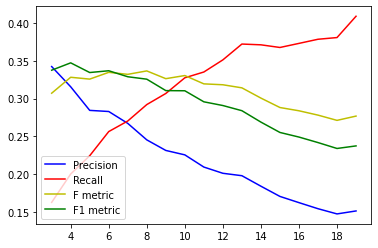

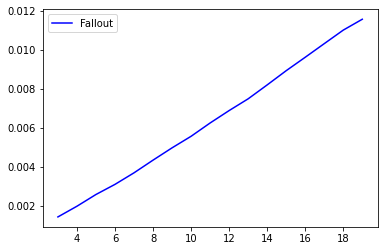

In [25]:
x = np.arange(3, 20)
ps, rs, fs, f1s, fls = [], [], [], [], []

for i in x:
    relevant_fun = lambda q: [i[1] for i in q.relevant]
    consult_fun = lambda q: probabilisticModel.Consult(q, size=int(i), retroalimentation=5)
    p, r, f, f1, fl, _, _  = evaluate_model(relevant_fun, consult_fun)
    ps.append(mean(p))
    rs.append(mean(r))
    fs.append(mean(f))
    f1s.append(mean(f1))
    fls.append(mean(fl))

plt.plot(x, ps, 'b', label='Precision')
plt.plot(x, rs, 'r', label='Recall')
plt.plot(x, fs, 'y', label='F metric')
plt.plot(x, f1s, 'g', label='F1 metric')
plt.legend()

plt.figure()
plt.plot(x, fls, 'b', label='Fallout')
plt.legend()
plt.show()

In [40]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: probabilisticModel.Consult(q, 6, 20)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")

Precision: 0.27629629629629626
Recall: 0.2508183538609146
F metric: 0.3323657525099194
F1 metric: 0.33445335995499215
Fallout: 0.003119042129239039
Time: 1.838283174302843 seg


# Conclusions

In [8]:
names = []
precision = []
recall = []
fmetric = []
f1metric = []
fallout = []
tme = []
mp = []

In [9]:
booleanModel = BooleanModel(documents)
relevant_fun = lambda q: [i[1] for i in q.relevant if i[2] == 1]
consult_fun = booleanModel.Consult
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

names.append('Boolean Model')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(None)

In [10]:
relevant_fun = lambda q: [i[1] for i in q.relevant if i[2]]
consult_fun = lambda q: booleanModel.Consult(q, relaxed=True)
_, _, _, _, _, _, m  = evaluate_model(relevant_fun, consult_fun)
consult_fun = lambda q: booleanModel.Consult(q, size=5, relaxed=True)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)
names.append('Boolean Model (relaxed)')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(mean(m))

In [72]:
vectorialModel = VectorialModel(documents)
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = vectorialModel.Consult
_, _, _, _, _, _, m  = evaluate_model(relevant_fun, consult_fun)
consult_fun = lambda q: vectorialModel.Consult(q, 7)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

names.append('Vectorial Model (classic)')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(mean(m))

In [11]:
vectorialModel = VectorialModel(documents)
relevant_fun = lambda q: [i[1] for i in q.relevant]
def consult_fun(q, size=7, steps=10):
    remarkable = vectorialModel.Consult(q, size)
    relevant = relevant_fun(q)
    for _ in range(steps):
        retro_relevant = [d.id for d in remarkable if d.id in relevant]
        retro_irrelevant = [d.id for d in remarkable if d.id not in relevant]
        remarkable = vectorialModel.ReConsult(q, retro_relevant, retro_irrelevant, size)
    return remarkable

p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

names.append('Vectorial Model (with retroalimentation)')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(None)

In [12]:
probabilisticModel = ProbabilisticModel(documents)
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = probabilisticModel.Consult
_, _, _, _, _, _, m  = evaluate_model(relevant_fun, consult_fun)
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: probabilisticModel.Consult(q, 6)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

names.append('Probabilistic Model (classic)')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(mean(m))

In [13]:
probabilisticModel = ProbabilisticModel(documents)
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: probabilisticModel.Consult(q, 7, 20)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

names.append('Probabilistic Model (with retroalimentation)')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(None)

In [14]:
from IPython.display import display
import pandas as pd
  
# creating a DataFrame
dct = {'Model' : names,
        'Precision' : precision,
        'Recall' : recall,
        'F metric': fmetric,
        'F1 metric': f1metric,
        'Fallout': fallout,
        'Time': tme,
        'Medium Average Precision': mp
       }
df = pd.DataFrame(dct)
  
# displaying the DataFrame
display(df)

,Model,Precision,Recall,F metric,F1 metric,Fallout,Time,Medium Average Precision
0,Boolean Model,0.687556,0.694815,0.987917,0.986958,0.000114,0.083539,NaN
1,Boolean Model (relaxed),0.223111,0.176278,0.259376,0.266138,0.002791,0.259664,0.206840
2,Vectorial Model (with retroalimentation),0.499048,0.506332,0.492632,0.487576,0.002517,0.335604,NaN
3,Probabilistic Model (classic),0.301481,0.283543,0.325280,0.325584,0.003011,0.096141,0.306648
4,Probabilistic Model (with retroalimentation),0.262222,0.278114,0.332524,0.327048,0.003710,1.772811,NaN
